<a href="https://colab.research.google.com/github/fisicadeparticulas/20210915_procesamientodearchivoslhe-Tzitlalli/blob/main/Ejemplo2_GC%26HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import plotly.express as px
 
data=pd.read_csv("https://goo.gl/g8y9TC")
 
data.head(100)

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
1,165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
2,165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
3,165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
4,165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,165617,83270791,G,9.4119,9.3237,0.7738,1.0215,9.3557,0.1090,0.0828,-1,G,4.2680,3.9905,1.4486,-0.4267,4.2453,-0.1003,0.3482,1
96,165617,82143842,G,10.7062,-5.9858,1.3776,-8.7684,6.1423,-1.1539,2.9154,-1,T,11.6660,-6.0095,-0.6941,-9.9744,6.0494,-1.2746,-3.0266,1
97,165617,83119174,G,8.4653,-0.6313,-7.9623,2.8024,7.9873,0.3440,-1.6499,1,G,11.3935,-1.0160,-9.0081,6.9011,9.0652,0.7021,-1.6831,-1
98,165617,82428773,G,14.1476,8.9618,10.3257,-3.6345,13.6724,-0.2628,0.8560,1,G,10.8692,5.8048,9.0663,-1.4949,10.7654,-0.1384,1.0013,-1


(array([ 2213.,  1885.,  1711., 10483.,   869.,  1029.,   477.,   462.,
          451.,   420.]),
 array([1.99979432, 2.30115504, 2.60251575, 2.90387646, 3.20523717,
        3.50659788, 3.8079586 , 4.10931931, 4.41068002, 4.71204073,
        5.01340144]),
 <a list of 10 Patch objects>)

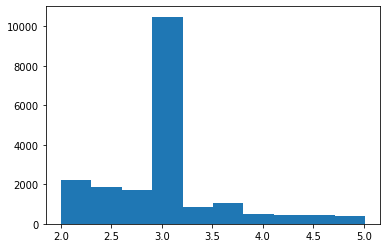

In [28]:

E= (data['E1'] + data['E2'])**2
Px= (data['px1']+data['px2'])**2
Py= (data['py1']+data['py2'])**2
Pz= (data['pz1']+data['pz2'])**2
P = Px + Py + Pz
EP = E-P

m = np.sqrt(EP)

plt.hist(m)

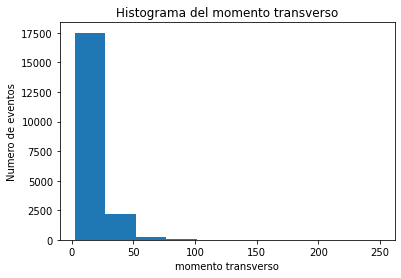

In [40]:

plt.hist (np.sqrt(data['px1']*data['px1']+data['py1']*data['py1']+data['pz1']*data['pz1']))
plt.title('Histograma del momento transverso')
plt.ylabel('Numero de eventos')
plt.xlabel('momento transverso')
plt.show()


In [29]:
def arctan(py1,px1):
    phi=[]
    for i,j in zip(py1,px1):
        if (j>=0):
            if (i>=0):
                phi.append(np.arctan(i/j))
            else:
                phi.append(np.arctan(i/j))
        else:
            if (i>=0):
                phi.append(np.pi+np.arctan(i/j))
            else:
                phi.append(-np.pi+np.arctan(i/j))
    return np.array(phi)
x=np.array([1,-1,-1,1])
y=np.array([1,1,-1,-1])
print(arctan(y,x)*180/np.pi)


[  45.  135. -135.  -45.]


In [30]:
def arctan(py2,px2):
    phi=[]
    for i,j in zip(py2,px2):
        if (j>=0):
            if (i>=0):
                phi.append(np.arctan(i/j))
            else:
                phi.append(np.arctan(i/j))
        else:
            if (i>=0):
                phi.append(np.pi+np.arctan(i/j))
            else:
                phi.append(-np.pi+np.arctan(i/j))
    return np.array(phi)
x=np.array([1,-1,-1,1])
y=np.array([1,1,-1,-1])
print(arctan(y,x)*180/np.pi)

[  45.  135. -135.  -45.]


In [31]:
phi_1=arctan(data['py1'],data['py1'])
phi_2=arctan(data['py2'],data['px2'])

fig_0=px.histogram(phi_1,x=phi_1[:],nbins=14)
fig_0.update_layout(
    title=r"$ \text{ Distribucion de }  \phi_1$",
    xaxis_title="Radianes",
    yaxis_title="Eventos")
fig_0.show()
fig_1=px.histogram(phi_2,x=phi_2[:],nbins=14)
fig_1.update_layout(
    title=r"$ \text{ Distribucion de }  \phi_2$",
    xaxis_title="Radianes",
    yaxis_title="Eventos")
fig_1.show()

In [32]:
phi_1=arctan(data['py1'],data['px1'])
phi_2=arctan(data['py2'],data['px2'])

dphi=np.abs(phi_2-phi_1)

fig=px.line(dphi,x=dphi[:],range_x=[3.1,3.2])
fig.update_layout(
    title=r"$ \text{ Distribucion de }  d\phi$",
    xaxis_title="Radianes",
    yaxis_title="Eventos")
fig.show()

In [36]:
p=np.sqrt(data['px1']**2+data['py1']**2+data['pz1']**2)
pz=data['pz1']

x=pz/p
theta=np.arccos(x)
def eta(x):
  eta=-np.log(np.tan(np.arccos(x)/2))
  return eta

eta=pd.DataFrame(eta(x))

fig_0=px.scatter(x=theta,y=eta)
fig_0.update_layout(
    title=r"$\theta  \ vs \ \eta$",
    xaxis_title=r"$\theta \text{[rad]} $",
    yaxis_title=r"$ \eta $")
fig_0.show()

In [37]:
bins=([14,30,100,1000])
for i in range(len(bins)):
  print(bins[i])
  fig_1=px.histogram(eta,x=eta[0],nbins=bins[i])
  fig_1.update_layout(title=r"$\text{Distribución de} \ \eta, \ \text{%d bins}$" %bins[i],
                      xaxis_title=r"$\eta$",
                      yaxis_title="Eventos")
  fig_1.show()

14


30


100


1000
